# importing librabry


In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

# load the dataset

In [186]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
gender_submission=pd.read_csv("gender_submission.csv")


In [187]:
testt=pd.read_csv("test.csv")
testt
test_id=testt["PassengerId"]
test_id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [188]:
train.shape


(891, 12)

In [189]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
test.shape

(418, 11)

In [191]:
gender_submission.shape

(418, 2)

In [192]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


get the "survived" column from gender_submission dataset and add this to the test.csv dataset so that combine the train and test dataset 

In [193]:
new_gender=gender_submission["Survived"]

In [194]:
new_gender.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [195]:
test.insert(1,column="Survived",value=new_gender)

In [196]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [197]:
test.shape

(418, 12)

In [198]:
df=pd.concat([train,test])

In [199]:
df.shape

(1309, 12)

In [200]:
#too musch null value in Age and Cabin columns
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [202]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [203]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.020370,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.020370,1.000000,-0.264710,-0.053695,0.002370,0.108919,0.233622
Pclass,-0.038354,-0.264710,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.053695,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,0.002370,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.108919,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.233622,-0.558629,0.178740,0.160238,0.221539,1.000000


<AxesSubplot:>

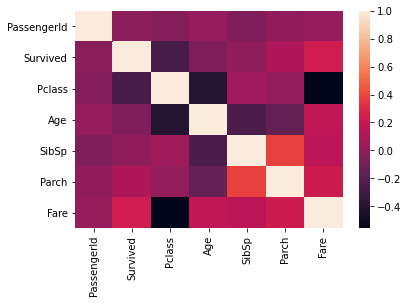

In [204]:
sns.heatmap(df.corr())

# dropping unwanted columns


In [205]:
df=df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
testt


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [206]:
testt=testt.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
testt

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [207]:
testt

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [208]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# get features and terget columns

In [209]:
Y=df.Survived
X=df.drop(["Survived"],axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [210]:
X.shape

(1309, 7)

# feature Engineering

In [211]:
pipe1=ColumnTransformer(transformers=[("num_imputer",SimpleImputer(strategy="mean"),['Age',"Fare"]),
                                      ("cat_imputer",SimpleImputer(strategy="most_frequent"),[6])]
                        ,remainder="passthrough")
new=pd.DataFrame(pipe1.fit_transform(X) )
new

,0,1,2,3,4,5,6
0,22.0,7.25,S,3,male,1,0
1,38.0,71.2833,C,1,female,1,0
2,26.0,7.925,S,3,female,0,0
3,35.0,53.1,S,1,female,1,0
4,35.0,8.05,S,3,male,0,0
...,...,...,...,...,...,...,...
1304,29.881138,8.05,S,3,male,0,0
1305,39.0,108.9,C,1,female,0,0
1306,38.5,7.25,S,3,male,0,0
1307,29.881138,8.05,S,3,male,0,0


In [212]:
pipe_2=ColumnTransformer(transformers=[("ohe",OneHotEncoder(sparse=False,drop="first"),[2,4])],remainder ="passthrough")
new=pd.DataFrame(pipe_2.fit_transform(new) )
new

,0,1,2,3,4,5,6,7
0,0.0,1.0,1.0,22.0,7.25,3,1,0
1,0.0,0.0,0.0,38.0,71.2833,1,1,0
2,0.0,1.0,0.0,26.0,7.925,3,0,0
3,0.0,1.0,0.0,35.0,53.1,1,1,0
4,0.0,1.0,1.0,35.0,8.05,3,0,0
...,...,...,...,...,...,...,...,...
1304,0.0,1.0,1.0,29.881138,8.05,3,0,0
1305,0.0,0.0,0.0,39.0,108.9,1,0,0
1306,0.0,1.0,1.0,38.5,7.25,3,0,0
1307,0.0,1.0,1.0,29.881138,8.05,3,0,0


In [213]:
pipe3=ColumnTransformer(transformers=[("scalr",StandardScaler(),[0,1,2,3,4,5,6,7])],remainder ="passthrough")

# data distribution(normal)

In [214]:
new

,0,1,2,3,4,5,6,7
0,0.0,1.0,1.0,22.0,7.25,3,1,0
1,0.0,0.0,0.0,38.0,71.2833,1,1,0
2,0.0,1.0,0.0,26.0,7.925,3,0,0
3,0.0,1.0,0.0,35.0,53.1,1,1,0
4,0.0,1.0,1.0,35.0,8.05,3,0,0
...,...,...,...,...,...,...,...,...
1304,0.0,1.0,1.0,29.881138,8.05,3,0,0
1305,0.0,0.0,0.0,39.0,108.9,1,0,0
1306,0.0,1.0,1.0,38.5,7.25,3,0,0
1307,0.0,1.0,1.0,29.881138,8.05,3,0,0


C:\Users\Asif_Pervez_Polok\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


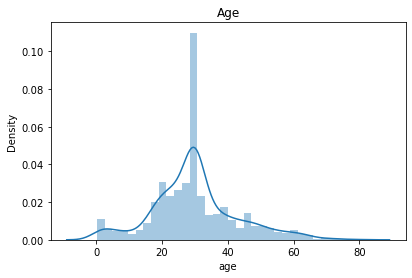

In [215]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(new[3])
plt.title("Age")
plt.xlabel("age")
plt.show()

In [216]:
#here age columns normally distributed

In [217]:
new[3].skew()

0.4559237444008716

C:\Users\Asif_Pervez_Polok\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


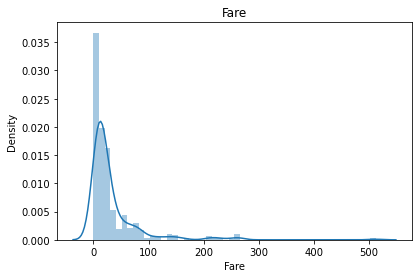

In [218]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(new[4])
plt.title("Fare")
plt.xlabel("Fare")

plt.show()

In [219]:
#here fare column is right skewed

In [220]:
new[4].skew()

4.369374593951007

In [221]:
pipe4=ColumnTransformer(transformers=[("skew",PowerTransformer(standardize=False),[4])],remainder ="passthrough")

new=pd.DataFrame(pipe4.fit_transform(new))

In [222]:
new[4].skew()

0.4559237444008716

C:\Users\Asif_Pervez_Polok\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


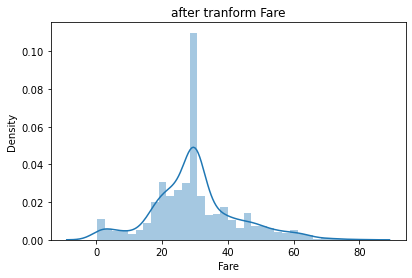

In [223]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(new[4])
plt.title("after tranform Fare")
plt.xlabel("Fare")

plt.show()

# train test split

In [224]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [225]:
pipe=Pipeline([("pipe1",pipe1),("pipe2",pipe_2) ,("pipe4",pipe4),("pipe3",pipe3)])

In [226]:
xtrain=pd.DataFrame(pipe.fit_transform(xtrain))
xtest=pd.DataFrame(pipe.transform(xtest))
testt=pd.DataFrame(pipe.transform(testt))

In [227]:
testt

,0,1,2,3,4,5,6,7
0,-0.836868,3.260879,-1.559739,0.737732,0.358488,0.852582,-0.489239,-0.429655
1,-0.951684,-0.306666,0.641133,-1.355507,1.345206,0.852582,0.442095,-0.429655
2,-0.618506,3.260879,-1.559739,0.737732,2.529268,-0.331309,-0.489239,-0.429655
3,-0.733111,-0.306666,0.641133,0.737732,-0.233543,0.852582,-0.489239,-0.429655
4,-0.375895,-0.306666,0.641133,-1.355507,-0.628231,0.852582,0.442095,0.720854
...,...,...,...,...,...,...,...,...
413,-0.808334,-0.306666,0.641133,0.737732,0.000000,0.852582,-0.489239,-0.429655
414,1.662992,-0.306666,-1.559739,-1.355507,0.713706,-1.515199,-0.489239,-0.429655
415,-0.915707,-0.306666,0.641133,0.737732,0.674237,0.852582,-0.489239,-0.429655
416,-0.808334,-0.306666,0.641133,0.737732,0.000000,0.852582,-0.489239,-0.429655


# model evaluation

In [228]:
#knn classifier
knn=KNeighborsClassifier(n_neighbors= 7,weights='uniform')
knn.fit(xtrain,ytrain)
ypred_knn=knn.predict(xtest)
print("KNN accuracy score:",accuracy_score(ytest,ypred_knn))
print("confusion metrics:",confusion_matrix(ytest,ypred_knn))

KNN accuracy score: 0.851145038167939
confusion metrics: [[141  18]
 [ 21  82]]


In [229]:
y_survived_knn=knn.predict(testt)

In [230]:
#support vector machine
svc=SVC()
svc.fit(xtrain,ytrain)
ypred_svc=svc.predict(xtest)
print("SVC accuracy score:",accuracy_score(ytest,ypred_svc))
print("confusion metrics:",confusion_matrix(ytest,ypred_svc))

SVC accuracy score: 0.8587786259541985
confusion metrics: [[143  16]
 [ 21  82]]


In [231]:
y_survived_svc=svc.predict(testt)

In [232]:
#random forest
rf=RandomForestClassifier(n_estimators=150, max_depth=8,max_samples=0.75 )
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print("Randome forest accuracy score:",accuracy_score(ytest,ypred_rf))
print("confusion metrics:",confusion_matrix(ytest,ypred_rf))

Randome forest accuracy score: 0.851145038167939
confusion metrics: [[144  15]
 [ 24  79]]


In [233]:
#ada boost algotithm
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred_ada=ada.predict(xtest)
print("Randome forest accuracy score:",accuracy_score(ytest,ypred_ada))
print("confusion metrics:",confusion_matrix(ytest,ypred_ada))

Randome forest accuracy score: 0.8664122137404581
confusion metrics: [[144  15]
 [ 20  83]]


In [234]:
y_survived=ada.predict(testt)

In [235]:
y_survived.shape

(418,)

In [236]:
#Gradiant boosting algorithm
gbc=GradientBoostingClassifier(criterion ="mse", learning_rate= 0.05,loss="exponential",n_estimators= 300)
gbc.fit(xtrain,ytrain)
ypred_gbc=gbc.predict(xtest)
print("Gradiant Boost accuracy score:",accuracy_score(ytest,ypred_gbc))
print("confusion metrics:",confusion_matrix(ytest,ypred_gbc))

Gradiant Boost accuracy score: 0.8473282442748091
confusion metrics: [[142  17]
 [ 23  80]]


In [237]:
dff=pd.DataFrame({"PassengerId":test_id,
                "Survived":y_survived})


In [238]:
dff.to_csv("submission.csv",index=False)